
# BackPropagation


Backpropagation is the key algorithm used for training neural networks, allowing them to learn from data. It is based on the gradient descent optimization technique and works by iteratively adjusting the weights and biases of the network to minimize the error between the predicted and actual outputs.
 In this lab, we will create a neural network to implement backpropagation for a XOR problem.


### XOR Problem
The XOR (exclusive OR) problem is a classic problem in artificial intelligence and machine learning. It is a logical operation that takes two binary inputs and returns a binary output. The output is true if exactly one of the inputs is true, and false otherwise.
The XOR problem is significant because it cannot be solved by a single-layer perceptron, which is a basic neural network model.
This is because the data is not linearly separable, meaning that a straight line cannot separate the output classes (0s and 1s).
To solve the XOR problem, a multi-layer perceptron (MLP) or a neural network with at least one hidden layer and non-linear activation functions is required.

# Objective for this notebook

* Train a Neural Network to Solve the XOR Problem
* Implement Backpropagation for Neural Network Training
* Demonstrate the Use of Activation Functions
* Understand the Learning Process Over Multiple Epochs
* Demonstrate Weight and Bias Adjustments via Gradient Descent
* Evaluate the Model's Performance After Training
* Monitor and Analyze the Training Process


<h2>Table of Contents</h2>

<font size = 4>
1. <a href="#Import-Required-Libraries">Import Required Libraries</a><br>
2. <a href="#Initialize-Inputs">Initialize Inputs</a><br>
3. <a href="#Declare-the-network-parameters">Declare the network parameters</a><br>
4. <a href="#Define-the-weights">Define the weights</a><br>  
5. <a href="#Training-the-Neural-Network">Training the Neural Network</a><br>  
6. <a href="#Testing-the-Network">Testing the Network</a><br>  
7. <a href="#Plot-the-error">Plot the error</a><br>  

</font>
</div>


## Import Required Libraries


In [1]:
# Importing the required library
import numpy as np
import matplotlib.pyplot as plt

## Initialize Inputs
Define the input and expected output for a XOR gate problem


In [2]:
# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

# Declare the network parameters & the weights

Define the network parameters such as
1. number of input neurons
2. hidden layer neurons
3. output neurons
4. learning rate
5. number of epochs

Also, Declare the weights for the neurons. The initial weights are taken as random numbers which are then optimized by the backpropagation algorithm inside a function parameter `initialize_network_parameters()`


In [3]:
def initialize_network_parameters():
    # Network parameters
    inputSize = 2      # Number of input neurons (x1, x2)
    hiddenSize = 2     # Number of hidden neurons
    outputSize = 1     # Number of output neurons
    lr = 0.1           # Learning rate
    epochs = 180000    # Number of training epochs

    # Initialize weights and biases randomly within the range [-1, 1]
    w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Weights from input to hidden layer
    b1 = np.random.rand(hiddenSize, 1) * 2 - 1          # Bias for hidden layer
    w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1 # Weights from hidden to output layer
    b2 = np.random.rand(outputSize, 1) * 2 - 1          # Bias for output layer

    return w1, b1, w2, b2, lr, epochs

## Training the Neural Network

The neural network works in 5 stages: 
1. Forward pass
    * The input **X** is multiplied by the weights **w1** and passed through the first layer, followed by the application of the sigmoid or ReLU activation function. This gives the output for the hidden layer.
    * The output of the hidden layer is then passed through the second set of weights **w2** to compute the final output. Again, a sigmoid activation function is used to generate the final output **a2**.
    
2. Error calculation
    * The error is computed as the difference between the expected output **(d)** and the actual output **(a2)**.
3. Backward pass
    * **Output Layer**: The derivative of the sigmoid activation function is applied to the error, producing the gradient for the output layer **(da2)**. This is used to calculate how much the weights in the output layer need to be adjusted.
    * **Hidden Layer**: The error is then propagated backward to the hidden layer. The gradient at the hidden layer **(da1)** is computed by taking the dot product of the transpose of the weights **(w2.T)** and the gradient from the output layer. The derivative of the activation function (sigmoid or ReLU) is used to adjust this error.
4. Weights and bias updates
    * After computing the **gradients (dz1, dz2)**, the **weights (w1, w2)** and **biases (b1, b2)** are updated using the **learning rate (lr)** and **the gradients**. The updates are done to minimize the error and improve the model’s predictions.
5. Training:
    * This entire process is repeated over many iterations **(epochs)**. During each epoch, the model adjusts its weights and biases to reduce the error. Over time, the network learns to approximate the XOR function.
Forward Pass:



In [4]:
# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.05174
Epoch: 19999, Average error: 0.03000
Epoch: 29999, Average error: 0.02303
Epoch: 39999, Average error: 0.01933
Epoch: 49999, Average error: 0.01696
Epoch: 59999, Average error: 0.01528
Epoch: 69999, Average error: 0.01401
Epoch: 79999, Average error: 0.01300
Epoch: 89999, Average error: 0.01218
Epoch: 99999, Average error: 0.01150
Epoch: 109999, Average error: 0.01092
Epoch: 119999, Average error: 0.01042
Epoch: 129999, Average error: 0.00998
Epoch: 139999, Average error: 0.00959
Epoch: 149999, Average error: 0.00924
Epoch: 159999, Average error: 0.00893
Epoch: 169999, Average error: 0.00865
Epoch: 179999, Average error: 0.00839


## Testing the Network
After training, you can now test the neural network to verify that it has learned the XOR function and outputs the correct values close to [0, 1, 1, 0]


In [5]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

Final output after training: [[0.00926265 0.99202801 0.99201875 0.00833419]]
Ground truth [0 1 1 0]
Error after training: [[-0.00926267  0.00797202  0.00798127 -0.00833422]]
Average error: 0.00839


## Plot the error
Here, we plot the error as a function of epochs. This shows how error changed over multiple iterations of forward and backward passes and how the network learnt over time


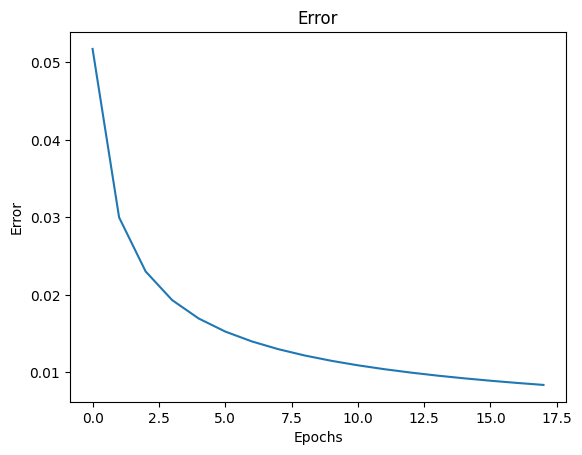

In [6]:
plt.plot(error_list)
plt.title("Error")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

# Practice exercise 1


Implement backpropagation for **AND problem** using similar input as used for XOR problem above and plot the error


In [7]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
d = np.array([0, 0, 0, 1])  # Expected output for AND

In [8]:
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

error_list = []
for epoch in range(epochs):
    z1 = np.dot(w1, X) + b1 
    a1 = 1 / (1 + np.exp(-z1))

    z2 = np.dot(w2, a1) + b2  
    a2 = 1 / (1 + np.exp(-z2))  

    error = d - a2  
    da2 = error * (a2 * (1 - a2))  
    dz2 = da2

    da1 = np.dot(w2.T, dz2)
    dz1 = da1 * (a1 * (1 - a1))

    w2 += lr * np.dot(dz2, a1.T)
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)

    w1 += lr * np.dot(dz1, X.T)
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.02292
Epoch: 19999, Average error: 0.01416
Epoch: 29999, Average error: 0.01098
Epoch: 39999, Average error: 0.00923
Epoch: 49999, Average error: 0.00810
Epoch: 59999, Average error: 0.00729
Epoch: 69999, Average error: 0.00668
Epoch: 79999, Average error: 0.00620
Epoch: 89999, Average error: 0.00580
Epoch: 99999, Average error: 0.00547
Epoch: 109999, Average error: 0.00519
Epoch: 119999, Average error: 0.00495
Epoch: 129999, Average error: 0.00474
Epoch: 139999, Average error: 0.00455
Epoch: 149999, Average error: 0.00438
Epoch: 159999, Average error: 0.00423
Epoch: 169999, Average error: 0.00409
Epoch: 179999, Average error: 0.00397


In [9]:
# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

In [10]:
# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


Final output after training: [[2.00564821e-04 4.50163056e-03 4.65266804e-03 9.93479906e-01]]
Ground truth [0 0 0 1]
Error after training: [[-0.00020057 -0.00450164 -0.00465268  0.00652011]]
Average error: 0.00397


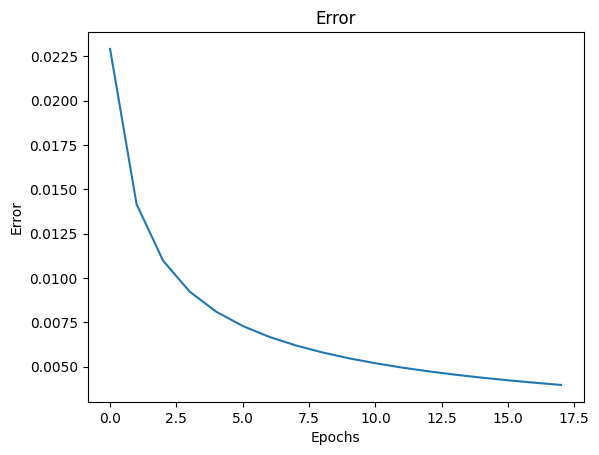

In [11]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Practice exercise 2


Now, decrease the learning rate to 0.01 and increase the number of epochs to 1000000 and check the error for XOR gate


In [12]:
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

lr = 0.01
epochs = 1000000

error_list = []
for epoch in range(epochs):
    z1 = np.dot(w1, X) + b1 
    a1 = 1 / (1 + np.exp(-z1))

    z2 = np.dot(w2, a1) + b2  
    a2 = 1 / (1 + np.exp(-z2))  

    error = d - a2  
    da2 = error * (a2 * (1 - a2))  
    dz2 = da2

    da1 = np.dot(w2.T, dz2)
    dz1 = da1 * (a1 * (1 - a1))

    w2 += lr * np.dot(dz2, a1.T)
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)

    w1 += lr * np.dot(dz1, X.T)
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

Epoch: 9999, Average error: 0.21936
Epoch: 19999, Average error: 0.10202
Epoch: 29999, Average error: 0.06666
Epoch: 39999, Average error: 0.05115
Epoch: 49999, Average error: 0.04240
Epoch: 59999, Average error: 0.03670
Epoch: 69999, Average error: 0.03267
Epoch: 79999, Average error: 0.02964
Epoch: 89999, Average error: 0.02726
Epoch: 99999, Average error: 0.02534
Epoch: 109999, Average error: 0.02375
Epoch: 119999, Average error: 0.02241
Epoch: 129999, Average error: 0.02125
Epoch: 139999, Average error: 0.02025
Epoch: 149999, Average error: 0.01936
Epoch: 159999, Average error: 0.01858
Epoch: 169999, Average error: 0.01788
Epoch: 179999, Average error: 0.01725
Epoch: 189999, Average error: 0.01667
Epoch: 199999, Average error: 0.01615
Epoch: 209999, Average error: 0.01567
Epoch: 219999, Average error: 0.01523
Epoch: 229999, Average error: 0.01482
Epoch: 239999, Average error: 0.01444
Epoch: 249999, Average error: 0.01409
Epoch: 259999, Average error: 0.01376
Epoch: 269999, Average 

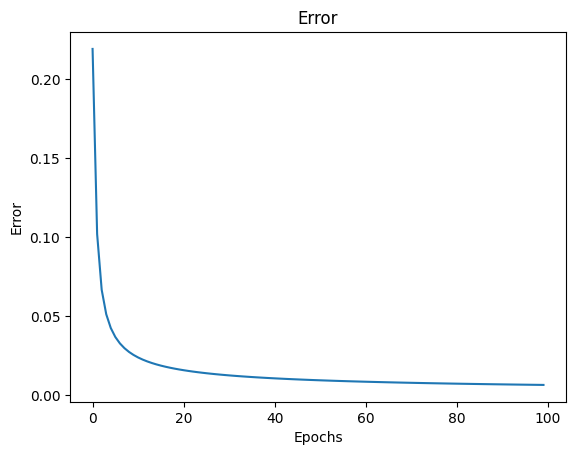

In [13]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()